In [1]:
# imports
import urllib, json
import pandas as pd
import gender_guesser.detector as gender
gd = gender.Detector()

In [57]:
movies = pd.read_csv(r'/Users/dayitadev/Documents/Career/BechdelTest/movies.csv')

In [58]:
movies.head()

,imdbid,year_x,rating,title_x,id,imdb_title_id,title_y,original_title,year_y,date_published,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,54167,1960,2,Peeping Tom,6796,tt0054167,L'occhio che uccide,Peeping Tom,1960,1960-11-29,...,"Karlheinz Böhm, Moira Shearer, Anna Massey, Ma...","A young man murders women, using a movie camer...",7.7,30018,GBP 135000,NaN,$ 24640,NaN,173.0,124.0
1,53804,1960,3,Exodus,2144,tt0053804,Exodus,Exodus,1960,1961-04-29,...,"Paul Newman, Eva Marie Saint, Ralph Richardson...","The state of Israel is created in 1948, result...",6.7,8709,$ 4000000,NaN,NaN,NaN,81.0,25.0
2,53472,1960,0,A bout de souffle,799,tt0053472,Fino all'ultimo respiro,À bout de souffle,1960,1960-09-30,...,"Jean Seberg, Jean-Paul Belmondo, Daniel Boulan...",A small-time thief steals a car and impulsivel...,7.9,71060,FRF 400000,$ 363031,$ 378503,NaN,207.0,201.0
3,54047,1960,0,"Magnificent Seven, The",1295,tt0054047,I magnifici sette,The Magnificent Seven,1960,1961-03-01,...,"Yul Brynner, Eli Wallach, Steve McQueen, Horst...",Seven gunfighters are hired by Mexican peasant...,7.7,85975,$ 2000000,NaN,NaN,74.0,295.0,130.0
4,53719,1960,3,"City of the Dead, The",3634,tt0053719,La città dei morti,The City of the Dead,1960,1960-09-01,...,"Dennis Lotis, Christopher Lee, Patricia Jessel...",A young college student arrives in a sleepy Ma...,6.8,5967,GBP 45000,NaN,NaN,NaN,143.0,89.0


In [59]:
movies.count()

imdbid                   7100
year_x                   7100
rating                   7100
title_x                  7100
id                       7100
imdb_title_id            7100
title_y                  7100
original_title           7100
year_y                   7100
date_published           7100
genre                    7100
duration                 7100
country                  7099
language                 7092
director                 7100
writer                   7094
production_company       7057
actors                   7100
description              7082
avg_vote                 7100
votes                    7100
budget                   4774
usa_gross_income         5205
worlwide_gross_income    5952
metascore                5277
reviews_from_users       7062
reviews_from_critics     7071
dtype: int64

In [60]:
# Extract director first name
movies['First'] = movies.director.str.split(" ",expand=True)[0]

In [61]:
movies['name1'] = movies['director'].str.split(" ")

In [62]:
movies['name'] = movies['First'].astype(str)

In [63]:
genders = []
for i in movies['name']:
    x = gd.get_gender(i)
    
movies['director_gender'] = x

In [64]:
movies.head()

,imdbid,year_x,rating,title_x,id,imdb_title_id,title_y,original_title,year_y,date_published,...,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,First,name1,name,director_gender
0,54167,1960,2,Peeping Tom,6796,tt0054167,L'occhio che uccide,Peeping Tom,1960,1960-11-29,...,GBP 135000,NaN,$ 24640,NaN,173.0,124.0,Michael,"[Michael, Powell]",Michael,male
1,53804,1960,3,Exodus,2144,tt0053804,Exodus,Exodus,1960,1961-04-29,...,$ 4000000,NaN,NaN,NaN,81.0,25.0,Otto,"[Otto, Preminger]",Otto,male
2,53472,1960,0,A bout de souffle,799,tt0053472,Fino all'ultimo respiro,À bout de souffle,1960,1960-09-30,...,FRF 400000,$ 363031,$ 378503,NaN,207.0,201.0,Jean-Luc,"[Jean-Luc, Godard]",Jean-Luc,male
3,54047,1960,0,"Magnificent Seven, The",1295,tt0054047,I magnifici sette,The Magnificent Seven,1960,1961-03-01,...,$ 2000000,NaN,NaN,74.0,295.0,130.0,John,"[John, Sturges]",John,male
4,53719,1960,3,"City of the Dead, The",3634,tt0053719,La città dei morti,The City of the Dead,1960,1960-09-01,...,GBP 45000,NaN,NaN,NaN,143.0,89.0,John,"[John, Llewellyn, Moxey]",John,male


In [69]:
# Clean the data a bit more; remove duplicate columns, split out genres, add a decade column for quick categorization
movies.drop(columns=['title_y', 'year_y'])

decades = []
for i in movies['year_x']:
    if i >= 1960 and i < 1970:
        decades.append(1960)
    elif i >= 1970 and i < 1980:
        decades.append(1970)
    elif i >= 1980 and i < 1990:
        decades.append(1980)
    elif i >= 1990 and i < 2000:
        decades.append(1990)
    elif i >= 2000 and i < 2010:
        decades.append(2000)
    elif i >= 2010 and i < 2020:
        decades.append(2010)
    elif i >= 2020 and i < 2030:
        decades.append(2020)
    
movies['decade'] = decades
movies['genres'] = movies['genre'].str.split(",")

In [70]:
movies.head()

,imdbid,year_x,rating,title_x,id,imdb_title_id,title_y,original_title,year_y,date_published,...,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,First,name1,name,director_gender,decade,genres
0,54167,1960,2,Peeping Tom,6796,tt0054167,L'occhio che uccide,Peeping Tom,1960,1960-11-29,...,$ 24640,NaN,173.0,124.0,Michael,"[Michael, Powell]",Michael,male,1960,"[Drama, Horror, Thriller]"
1,53804,1960,3,Exodus,2144,tt0053804,Exodus,Exodus,1960,1961-04-29,...,NaN,NaN,81.0,25.0,Otto,"[Otto, Preminger]",Otto,male,1960,"[Action, Drama, History]"
2,53472,1960,0,A bout de souffle,799,tt0053472,Fino all'ultimo respiro,À bout de souffle,1960,1960-09-30,...,$ 378503,NaN,207.0,201.0,Jean-Luc,"[Jean-Luc, Godard]",Jean-Luc,male,1960,"[Crime, Drama]"
3,54047,1960,0,"Magnificent Seven, The",1295,tt0054047,I magnifici sette,The Magnificent Seven,1960,1961-03-01,...,NaN,74.0,295.0,130.0,John,"[John, Sturges]",John,male,1960,"[Action, Adventure, Western]"
4,53719,1960,3,"City of the Dead, The",3634,tt0053719,La città dei morti,The City of the Dead,1960,1960-09-01,...,NaN,NaN,143.0,89.0,John,"[John, Llewellyn, Moxey]",John,male,1960,"[Horror, Mystery, Thriller]"


In [71]:
# Begin exploratory analysis: 
# check distribution over the years of director genders
# append bechdel scores as well
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

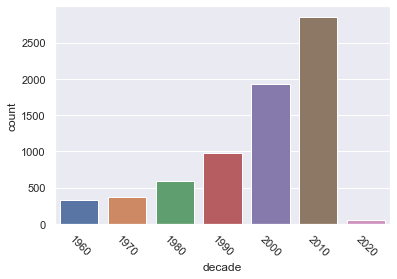

In [72]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='decade', data=movies)
 
# Rotate x-labels
plt.xticks(rotation=-45)